In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Train {X_train.shape} {y_train.shape}")
print(f"Test {X_test.shape} {y_test.shape}")

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


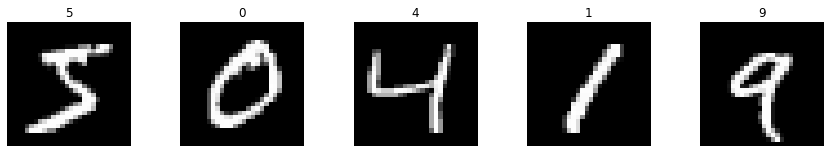

In [5]:
plt.figure(figsize=(15,5))
nb_samples = 5

for i in range(nb_samples):
    plt.subplot(2,nb_samples,i + 1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(y_train[i])
    plt.axis("off")

plt.show()

In [6]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs = 10,)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4581 - accuracy: 0.8622
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1109 - accuracy: 0.9663 0s - loss: 0
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0748 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0532 - accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0427 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341 - accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9909: 0s - loss: 0.0272 - accura
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 10/10
1875/1875 [================

In [10]:
model.evaluate(X_test,y_test,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.9768


[0.09844262897968292, 0.9768000245094299]

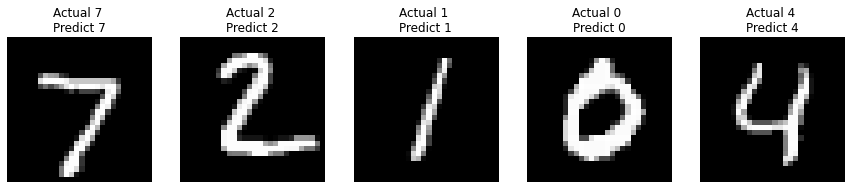

In [19]:
plt.figure(figsize=(15,5))

nb_img = 5
for i in range(nb_img):
    plt.subplot(1,nb_img, i + 1)
    x_test_flattened = X_test[i].reshape(-1, 28 * 28)
    y_pred = model.predict(x_test_flattened)
    plt.imshow(X_test[i],cmap = 'gray')
    plt.title(f"Actual {y_test[i]} \nPredict {np.argmax(y_pred)}")
    plt.axis("off")

plt.show()